In [1]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import pandas as pd
os.environ['CUDA_VISIBLE_DEVICES'] = '1'
device_name = tf.test.gpu_device_name()
print(device_name)


Bad key "text.kerning_factor" on line 4 in
C:\Users\yumin\.conda\envs\tf_gpu\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
#Read the total Canadian confirmed data, generating initial
initial=pd.read_csv('C:/Users/yumin/Desktop/RNN confirmed/israel_confirmed.csv')
pd.DataFrame(initial,columns=range(0,100))
print(type(initial))
initial.columns

<class 'pandas.core.frame.DataFrame'>


Index(['Country/Region', 'Lat', 'Long', '2001/1/21', '2001/2/21', '2001/3/21',
       '2001/4/21', '2001/5/21', '2001/6/21', '2001/7/21',
       ...
       '3/31/21', '2004/1/21', '2004/2/21', '2004/3/21', '2004/4/21',
       '2004/5/21', '2004/6/21', '2004/7/21', '2004/8/21', '2004/9/21'],
      dtype='object', length=102)

In [3]:
#Delete columns unrelated to this code, generating INITIAL_DROPCONLUMS
initial_dropconlums=initial.drop(['Country/Region','Lat','Long'],axis=1)

In [4]:
#Change the INDEX in the INITIAL_DROPCONLUMS table to a number
initial_dropconlums.columns=range(0,initial_dropconlums.shape[1])
print(initial_dropconlums)

       0       1       2       3       4       5       6       7       8   \
0  428510  434799  441542  448173  456139  463448  471048  477357  485434   

       9   ...      89      90      91      92      93      94      95  \
0  491319  ...  833105  833456  833707  834070  834247  834603  834920   

       96      97      98  
0  835216  835486  835674  

[1 rows x 99 columns]


In [5]:
#Change the cumulative confirmed data into new data every day and save it into a CSV file
import numpy as np
ay=np.zeros((initial_dropconlums.shape[1],initial_dropconlums.shape[0]))
for a in range(98):
    deffirence=initial_dropconlums[a+1]-initial_dropconlums[a]
    ay[a]=deffirence    

print(ay.shape)
traindata=pd.read_csv('C:/Users/yumin/Desktop/ENEL 645/final/israel_deffirence.csv',index_col=None,names=range(1,100))
np.savetxt("C:/Users/yumin/Desktop/ENEL 645/final/israel_deffirence.csv", ay, delimiter=",")
traindata=pd.read_csv('C:/Users/yumin/Desktop/ENEL 645/final/israel_deffirence.csv',index_col=None)

(99, 1)


In [6]:
print(traindata)
traindata.shape

    6.289000000000000000e+03
0                     6743.0
1                     6631.0
2                     7966.0
3                     7309.0
4                     7600.0
..                       ...
93                     317.0
94                     296.0
95                     270.0
96                     188.0
97                       0.0

[98 rows x 1 columns]


(98, 1)

In [7]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
class data_preprocessing:
    def __init__(self,train_data,date):
        self.train_data = train_data
        self.date = date
    def train_test_split_data(train_data,date):
        dates=list(date.columns)
        dates1=dates[4:]
        dates=np.array(dates1)
        train_data=train_data.values
        nsplit1 = int(0.6*train_data.shape[0])
        nsplit2 = int(0.8*train_data.shape[0])
        X_train = train_data[:nsplit1]
        X_test = train_data[nsplit1:nsplit2]
        X_valid= train_data[nsplit2:]
        test_start_date=dates[-7]
        print(test_start_date)
        day=[]
        for i in range(0,100):
          day.append(i+1)
        day=np.array(day)
        print(day)
        return X_train,X_test,dates,nsplit1,nsplit2,test_start_date,X_valid
    def traindata_MinMaxScaler():
        X_train,X_test,dates,nsplit1,nsplit2,test_start_date,X_valid= data_preprocessing.train_test_split_data(traindata,initial)
#         train_fit = np.expand_dims(X_train, axis = 1)   
        scaler=MinMaxScaler(feature_range = (0,1))
        training_set_scaled = scaler.fit_transform(X_train)
        test_set_scaled = scaler.fit_transform(X_test)
        valid_set_scaled = scaler.fit_transform(X_valid)
        
        return training_set_scaled,test_set_scaled,scaler,valid_set_scaled
    def create_y_train(self):
#         X_train,X_test,dates,nsplit1,nsplit2,test_start_date= data_preprocessing.train_test_split_data(traindata,initial)
#         train_fit = np.expand_dims(X_train, axis = 1)
#         scaler = MinMaxScaler.fit(train_fit)
        
        training_set_scaled,test_set_scaled,scaler,valid_set_scaled=data_preprocessing.traindata_MinMaxScaler()
#         org_dataframe=training_set_scaled
#         training_set_scaled=scaler.fit_transform(org_dataframe.reshape(-1,1))
#         print(len(training_set_scaled))
        time_steps=10
        x_data=[]
        y_data=[]
        for i in range(time_steps,len(training_set_scaled)):
          x_data.append(training_set_scaled[i-time_steps:i,0])
          y_data.append(training_set_scaled[i,0])
        x_data=np.array(x_data)
        print("x_data_shape",x_data.shape)
        y_data=np.array(y_data)
        print("y_data_shape",y_data.shape)
        x_data=np.reshape(x_data,(x_data.shape[0],x_data.shape[1],1))
        y_data=np.reshape(y_data,(y_data.shape[0],1))
        print('Reshaped x_data shape' , x_data.shape)
        print('Reshaped y_data shape' , y_data.shape)
        print(x_data.shape[1])
        return x_data,y_data
    def create_y_test(self):
        time_steps=10
        x_test=[]
        y_test=[]
        training_set_scaled,test_set_scaled,scaler,valid_set_scaled=data_preprocessing.traindata_MinMaxScaler()
        for i in range(time_steps,len(test_set_scaled)):
          x_test.append(test_set_scaled[i-time_steps:i])
          y_test.append(training_set_scaled[i,0])

        x_test=np.array(x_test)
        y_test=np.array(y_test)
        y_test=np.reshape(y_test,(y_test.shape[0],1))
        return x_test,y_test
    def create_y_valid(self):
        time_steps=10
        x_valid=[]
        y_valid=[]
        training_set_scaled,test_set_scaled,scaler,valid_set_scaled=data_preprocessing.traindata_MinMaxScaler()
        for i in range(time_steps,len(valid_set_scaled)):
          x_valid.append(valid_set_scaled[i-time_steps:i])
          y_valid.append(valid_set_scaled[i,0])

        x_valid=np.array(x_valid)
        y_valid=np.array(y_valid)
        y_valid=np.reshape(y_valid,(y_valid.shape[0],1))
        return x_valid,y_valid



# X_train,X_test,dates,nsplit1,nsplit2,test_start_date= data_preprocessing.train_test_split_data(traindata,initial)
preprocessing=data_preprocessing(traindata,initial)
X_train,X_test,dates,nsplit1,nsplit2,test_start_date,X_valid= data_preprocessing.train_test_split_data(traindata,initial)
# training_set_scaled,test_set_scaled=preprocessing.traindata_MinMaxScaler()
training_set_scaled,test_set_scaled,scaler,valid_set_scaled=data_preprocessing.traindata_MinMaxScaler()
x_data,y_data=preprocessing.create_y_train()
x_test,y_test=preprocessing.create_y_test()
x_valid,y_valid=preprocessing.create_y_valid()
data_preprocessing.train_test_split_data(traindata,initial)
# print(x_data)

2004/3/21
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]
2004/3/21
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]
2004/3/21
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  

(array([[ 6743.],
        [ 6631.],
        [ 7966.],
        [ 7309.],
        [ 7600.],
        [ 6309.],
        [ 8077.],
        [ 5885.],
        [ 9754.],
        [ 8990.],
        [ 9997.],
        [ 9754.],
        [ 5235.],
        [ 8450.],
        [ 8190.],
        [ 6560.],
        [ 7380.],
        [10213.],
        [ 7027.],
        [ 6159.],
        [ 4933.],
        [ 3442.],
        [ 3666.],
        [ 8587.],
        [11934.],
        [ 7305.],
        [ 5096.],
        [ 4798.],
        [ 4646.],
        [ 8811.],
        [ 7732.],
        [ 8896.],
        [ 6744.],
        [ 5238.],
        [ 4727.],
        [ 6518.],
        [ 4427.],
        [ 7191.],
        [ 6010.],
        [ 5083.],
        [ 3934.],
        [ 3100.],
        [ 2534.],
        [ 5913.],
        [ 4282.],
        [ 4054.],
        [ 3305.],
        [ 2579.],
        [    0.],
        [ 5530.],
        [ 4955.],
        [ 4574.],
        [ 4184.],
        [ 3970.],
        [ 3054.],
        [ 

In [8]:
print(y_data.shape)

(48, 1)


In [9]:
import tensorflow.keras as models
n_hidden_units=20
model = models.Sequential()
model.add(tf.keras.layers.GRU(units=50,return_sequences=True,recurrent_dropout=0.2,input_shape=(x_data.shape[1],1)))
# model.add(tf.keras.layers.Masking(mask_value=1, input_shape=(x_data.shape[1],1)))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.GRU(units=n_hidden_units,activation='selu',kernel_initializer='orthogonal', recurrent_initializer='orthogonal',
              bias_initializer='zeros',
              bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, recurrent_constraint=None,
              bias_constraint=None, dropout=0.5, recurrent_dropout=0.0, implementation=1, return_sequences=True,#多层时需设置为true
              return_state=False, go_backwards=False, stateful=False, unroll=False),merge_mode='concat'))   #input_shape=(max_lenth, max_features),
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.GRU(units=n_hidden_units,activation='selu',kernel_initializer='orthogonal', recurrent_initializer='orthogonal',
              bias_initializer='zeros',
              bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, recurrent_constraint=None,
              bias_constraint=None, dropout=0.5, recurrent_dropout=0.0, implementation=1, return_sequences=True,
              return_state=False, go_backwards=False, stateful=False, unroll=False),merge_mode='concat'))   #input_shape=(max_lenth, max_features),

# model.add(tf.keras.layers.GRU(512, 
#                              return_sequences=True, 
#                             kernel_initializer='orthogonal', activation='selu'))
# model.add(tf.keras.layers.Dropout(0.5))
# embedding_dim, input_dim=embedding_dim, consume_less='mem', return_sequences=True
# model.add(Attention(keras.layers.wrappers))
# model.add(TimeDistributed(Dense(1, activation='sigmoid')))
model.add(tf.keras.layers.Dense(units=1))
# model.add(BatchNormalization())
# model.add(tf.keras.layers.core.Activation('sigmoid'))
model.compile(optimizer='rmsprop',loss='mean_squared_error',metrics=['mae'])
model.summary()
#  kernel_regularizer=regularizers.l2(0.01),

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 10, 50)            7950      
_________________________________________________________________
bidirectional (Bidirectional (None, 10, 40)            8640      
_________________________________________________________________
bidirectional_1 (Bidirection (None, 10, 40)            7440      
_________________________________________________________________
dense (Dense)                (None, 10, 1)             41        
Total params: 24,071
Trainable params: 24,071
Non-trainable params: 0
_________________________________________________________________


Epoch 1/600
5/5 [==============================] - 4s 734ms/step - loss: 0.1793 - mae: 0.3119 - val_loss: 0.0950 - val_mae: 0.2768
Epoch 2/600
5/5 [==============================] - 0s 33ms/step - loss: 0.0454 - mae: 0.1660 - val_loss: 0.0723 - val_mae: 0.2373
Epoch 3/600
5/5 [==============================] - 0s 35ms/step - loss: 0.0511 - mae: 0.1754 - val_loss: 0.0581 - val_mae: 0.2083
Epoch 4/600
5/5 [==============================] - 0s 38ms/step - loss: 0.0452 - mae: 0.1675 - val_loss: 0.0874 - val_mae: 0.2667
Epoch 5/600
5/5 [==============================] - 0s 56ms/step - loss: 0.0429 - mae: 0.1619 - val_loss: 0.0390 - val_mae: 0.1609
Epoch 6/600
5/5 [==============================] - 0s 44ms/step - loss: 0.0485 - mae: 0.1754 - val_loss: 0.0570 - val_mae: 0.2089
Epoch 7/600
5/5 [==============================] - 0s 55ms/step - loss: 0.0482 - mae: 0.1733 - val_loss: 0.0644 - val_mae: 0.2260
Epoch 8/600
5/5 [==============================] - 0s 48ms/step - loss: 0.0405 - mae: 0.1

5/5 [==============================] - 0s 41ms/step - loss: 0.0325 - mae: 0.1453 - val_loss: 0.1011 - val_mae: 0.2917
Epoch 64/600
5/5 [==============================] - 0s 37ms/step - loss: 0.0300 - mae: 0.1417 - val_loss: 0.1146 - val_mae: 0.3129
Epoch 65/600
5/5 [==============================] - 0s 37ms/step - loss: 0.0318 - mae: 0.1355 - val_loss: 0.0796 - val_mae: 0.2586
Epoch 66/600
5/5 [==============================] - 0s 37ms/step - loss: 0.0322 - mae: 0.1409 - val_loss: 0.0865 - val_mae: 0.2698
Epoch 67/600
5/5 [==============================] - 0s 36ms/step - loss: 0.0312 - mae: 0.1412 - val_loss: 0.0770 - val_mae: 0.2547
Epoch 68/600
5/5 [==============================] - 0s 48ms/step - loss: 0.0334 - mae: 0.1446 - val_loss: 0.1002 - val_mae: 0.2902
Epoch 69/600
5/5 [==============================] - 0s 49ms/step - loss: 0.0307 - mae: 0.1380 - val_loss: 0.0733 - val_mae: 0.2481
Epoch 70/600
5/5 [==============================] - 0s 48ms/step - loss: 0.0292 - mae: 0.1380 - 

5/5 [==============================] - 0s 39ms/step - loss: 0.0275 - mae: 0.1318 - val_loss: 0.0969 - val_mae: 0.2847
Epoch 126/600
5/5 [==============================] - 0s 48ms/step - loss: 0.0298 - mae: 0.1360 - val_loss: 0.0749 - val_mae: 0.2507
Epoch 127/600
5/5 [==============================] - 0s 43ms/step - loss: 0.0258 - mae: 0.1340 - val_loss: 0.1217 - val_mae: 0.3240
Epoch 128/600
5/5 [==============================] - 0s 56ms/step - loss: 0.0290 - mae: 0.1380 - val_loss: 0.1405 - val_mae: 0.3526
Epoch 129/600
5/5 [==============================] - 0s 52ms/step - loss: 0.0288 - mae: 0.1345 - val_loss: 0.1204 - val_mae: 0.3222
Epoch 130/600
5/5 [==============================] - 0s 40ms/step - loss: 0.0292 - mae: 0.1420 - val_loss: 0.1006 - val_mae: 0.2902
Epoch 131/600
5/5 [==============================] - 0s 43ms/step - loss: 0.0262 - mae: 0.1321 - val_loss: 0.1028 - val_mae: 0.2933
Epoch 132/600
5/5 [==============================] - 0s 50ms/step - loss: 0.0263 - mae: 0.

5/5 [==============================] - 0s 57ms/step - loss: 0.0299 - mae: 0.1393 - val_loss: 0.1051 - val_mae: 0.2967
Epoch 188/600
5/5 [==============================] - 0s 45ms/step - loss: 0.0294 - mae: 0.1330 - val_loss: 0.0941 - val_mae: 0.2782
Epoch 189/600
5/5 [==============================] - 0s 55ms/step - loss: 0.0276 - mae: 0.1304 - val_loss: 0.0828 - val_mae: 0.2609
Epoch 190/600
5/5 [==============================] - 0s 35ms/step - loss: 0.0255 - mae: 0.1277 - val_loss: 0.0996 - val_mae: 0.2872
Epoch 191/600
5/5 [==============================] - 0s 40ms/step - loss: 0.0251 - mae: 0.1289 - val_loss: 0.1266 - val_mae: 0.3326
Epoch 192/600
5/5 [==============================] - 0s 36ms/step - loss: 0.0250 - mae: 0.1224 - val_loss: 0.0770 - val_mae: 0.2508
Epoch 193/600
5/5 [==============================] - 0s 33ms/step - loss: 0.0295 - mae: 0.1403 - val_loss: 0.1024 - val_mae: 0.2919
Epoch 194/600
5/5 [==============================] - 0s 44ms/step - loss: 0.0293 - mae: 0.

5/5 [==============================] - 0s 26ms/step - loss: 0.0236 - mae: 0.1115 - val_loss: 0.1009 - val_mae: 0.2879
Epoch 250/600
5/5 [==============================] - 0s 24ms/step - loss: 0.0218 - mae: 0.1160 - val_loss: 0.1018 - val_mae: 0.2856
Epoch 251/600
5/5 [==============================] - 0s 26ms/step - loss: 0.0223 - mae: 0.1113 - val_loss: 0.0934 - val_mae: 0.2706
Epoch 252/600
5/5 [==============================] - 0s 38ms/step - loss: 0.0249 - mae: 0.1232 - val_loss: 0.1140 - val_mae: 0.3107
Epoch 253/600
5/5 [==============================] - 0s 43ms/step - loss: 0.0206 - mae: 0.1064 - val_loss: 0.0733 - val_mae: 0.2333
Epoch 254/600
5/5 [==============================] - 0s 35ms/step - loss: 0.0222 - mae: 0.1188 - val_loss: 0.1256 - val_mae: 0.3281
Epoch 255/600
5/5 [==============================] - 0s 33ms/step - loss: 0.0218 - mae: 0.1141 - val_loss: 0.0912 - val_mae: 0.2680
Epoch 256/600
5/5 [==============================] - 0s 30ms/step - loss: 0.0221 - mae: 0.

5/5 [==============================] - 0s 32ms/step - loss: 0.0216 - mae: 0.1122 - val_loss: 0.0799 - val_mae: 0.2414
Epoch 312/600
5/5 [==============================] - 0s 32ms/step - loss: 0.0197 - mae: 0.1111 - val_loss: 0.1150 - val_mae: 0.3051
Epoch 313/600
5/5 [==============================] - 0s 29ms/step - loss: 0.0203 - mae: 0.1081 - val_loss: 0.0930 - val_mae: 0.2649
Epoch 314/600
5/5 [==============================] - 0s 28ms/step - loss: 0.0226 - mae: 0.1143 - val_loss: 0.1053 - val_mae: 0.2894
Epoch 315/600
5/5 [==============================] - 0s 29ms/step - loss: 0.0223 - mae: 0.1084 - val_loss: 0.1028 - val_mae: 0.2853
Epoch 316/600
5/5 [==============================] - 0s 30ms/step - loss: 0.0194 - mae: 0.1061 - val_loss: 0.0827 - val_mae: 0.2459
Epoch 317/600
5/5 [==============================] - 0s 40ms/step - loss: 0.0190 - mae: 0.1065 - val_loss: 0.1106 - val_mae: 0.2982
Epoch 318/600
5/5 [==============================] - 0s 34ms/step - loss: 0.0194 - mae: 0.

5/5 [==============================] - 0s 38ms/step - loss: 0.0175 - mae: 0.1017 - val_loss: 0.1304 - val_mae: 0.3250
Epoch 374/600
5/5 [==============================] - 0s 41ms/step - loss: 0.0173 - mae: 0.1020 - val_loss: 0.0962 - val_mae: 0.2659
Epoch 375/600
5/5 [==============================] - 0s 36ms/step - loss: 0.0213 - mae: 0.1064 - val_loss: 0.0820 - val_mae: 0.2423
Epoch 376/600
5/5 [==============================] - 0s 32ms/step - loss: 0.0196 - mae: 0.1071 - val_loss: 0.0816 - val_mae: 0.2389
Epoch 377/600
5/5 [==============================] - 0s 42ms/step - loss: 0.0179 - mae: 0.1038 - val_loss: 0.0982 - val_mae: 0.2700
Epoch 378/600
5/5 [==============================] - 0s 35ms/step - loss: 0.0212 - mae: 0.1099 - val_loss: 0.0869 - val_mae: 0.2494
Epoch 379/600
5/5 [==============================] - 0s 36ms/step - loss: 0.0194 - mae: 0.1052 - val_loss: 0.1083 - val_mae: 0.2829
Epoch 380/600
5/5 [==============================] - 0s 32ms/step - loss: 0.0189 - mae: 0.

5/5 [==============================] - 0s 32ms/step - loss: 0.0169 - mae: 0.1008 - val_loss: 0.0840 - val_mae: 0.2425
Epoch 436/600
5/5 [==============================] - 0s 33ms/step - loss: 0.0189 - mae: 0.1071 - val_loss: 0.1171 - val_mae: 0.2999
Epoch 437/600
5/5 [==============================] - 0s 37ms/step - loss: 0.0179 - mae: 0.1055 - val_loss: 0.0900 - val_mae: 0.2516
Epoch 438/600
5/5 [==============================] - 0s 35ms/step - loss: 0.0197 - mae: 0.1080 - val_loss: 0.1018 - val_mae: 0.2713
Epoch 439/600
5/5 [==============================] - 0s 32ms/step - loss: 0.0151 - mae: 0.0927 - val_loss: 0.1078 - val_mae: 0.2792
Epoch 440/600
5/5 [==============================] - 0s 32ms/step - loss: 0.0162 - mae: 0.0949 - val_loss: 0.1169 - val_mae: 0.2910
Epoch 441/600
5/5 [==============================] - 0s 34ms/step - loss: 0.0217 - mae: 0.1154 - val_loss: 0.0974 - val_mae: 0.2646
Epoch 442/600
5/5 [==============================] - 0s 32ms/step - loss: 0.0168 - mae: 0.

5/5 [==============================] - 0s 39ms/step - loss: 0.0162 - mae: 0.1005 - val_loss: 0.0927 - val_mae: 0.2446
Epoch 498/600
5/5 [==============================] - 0s 34ms/step - loss: 0.0154 - mae: 0.0975 - val_loss: 0.0931 - val_mae: 0.2524
Epoch 499/600
5/5 [==============================] - 0s 30ms/step - loss: 0.0134 - mae: 0.0910 - val_loss: 0.0981 - val_mae: 0.2521
Epoch 500/600
5/5 [==============================] - 0s 30ms/step - loss: 0.0167 - mae: 0.0982 - val_loss: 0.0930 - val_mae: 0.2496
Epoch 501/600
5/5 [==============================] - 0s 29ms/step - loss: 0.0169 - mae: 0.1010 - val_loss: 0.1018 - val_mae: 0.2687
Epoch 502/600
5/5 [==============================] - 0s 30ms/step - loss: 0.0159 - mae: 0.0987 - val_loss: 0.0959 - val_mae: 0.2568
Epoch 503/600
5/5 [==============================] - 0s 32ms/step - loss: 0.0164 - mae: 0.1030 - val_loss: 0.0986 - val_mae: 0.2619
Epoch 504/600
5/5 [==============================] - 0s 31ms/step - loss: 0.0145 - mae: 0.

5/5 [==============================] - 0s 44ms/step - loss: 0.0135 - mae: 0.0888 - val_loss: 0.0990 - val_mae: 0.2593
Epoch 560/600
5/5 [==============================] - 0s 31ms/step - loss: 0.0160 - mae: 0.0980 - val_loss: 0.0727 - val_mae: 0.2173
Epoch 561/600
5/5 [==============================] - 0s 29ms/step - loss: 0.0132 - mae: 0.0884 - val_loss: 0.0975 - val_mae: 0.2532
Epoch 562/600
5/5 [==============================] - 0s 32ms/step - loss: 0.0133 - mae: 0.0892 - val_loss: 0.0819 - val_mae: 0.2329
Epoch 563/600
5/5 [==============================] - 0s 31ms/step - loss: 0.0130 - mae: 0.0913 - val_loss: 0.1073 - val_mae: 0.2731
Epoch 564/600
5/5 [==============================] - 0s 34ms/step - loss: 0.0164 - mae: 0.1003 - val_loss: 0.0914 - val_mae: 0.2425
Epoch 565/600
5/5 [==============================] - 0s 31ms/step - loss: 0.0129 - mae: 0.0877 - val_loss: 0.1074 - val_mae: 0.2746
Epoch 566/600
5/5 [==============================] - 0s 32ms/step - loss: 0.0116 - mae: 0.

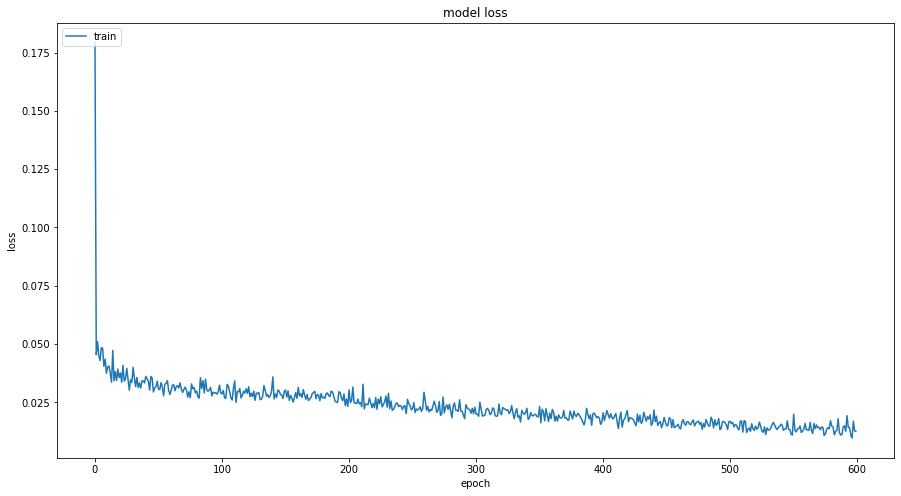

In [10]:

history_rnn=model.fit(x_data,y_data,epochs=600,validation_data =(x_test,y_test),batch_size=10)

history_rnn
loss_history = history_rnn.history["loss"]
# testing_loss_history = history_rnn.history["val_loss"]
plt.figure(figsize=(15, 8))
plt.title('model loss')
plt.plot(history_rnn.history['loss'], label='train')
# plt.plot(history_rnn.history['val_loss'], label='test')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('loss_model_mse.png')
plt.show()

In [11]:
score=model.evaluate(x_valid,y_valid)
print('score is: test_loss %f, mae %f' % (score[0],score[1]))

1/1 [==============================] - 0s 998us/step - loss: 0.0730 - mae: 0.1660
score is: test_loss 0.073046, mae 0.165968


In [12]:

predicted_covid_19_spread=model.predict(x_valid)
# print(predicted_covid_19_spread)
predict_val=[]
# scaler = MinMaxScaler(feature_range = (0,1))
for i in range(0,predicted_covid_19_spread.shape[0]):
  print(predicted_covid_19_spread[i].mean())
  predict_val.append(predicted_covid_19_spread[i].mean())

predict_val=np.array(predict_val).reshape(-1,1)
predict=scaler.inverse_transform(predict_val)

print("The predicted perday spread from ",test_start_date,"is")
print(predict)



1.0594631
0.64149743
0.31239542
0.30906576
0.28758627
0.35080376
0.32215247
0.28270203
0.23220551
0.19650546
The predicted perday spread from  2004/3/21 is
[[1050.9874 ]
 [ 636.3655 ]
 [ 309.89627]
 [ 306.59323]
 [ 285.28558]
 [ 347.99734]
 [ 319.57526]
 [ 280.4404 ]
 [ 230.34787]
 [ 194.93341]]


In [13]:

y_valid=np.array(y_valid).reshape(-1,1)
actual=scaler.inverse_transform(y_valid)
print(actual)


[[351.]
 [251.]
 [363.]
 [177.]
 [356.]
 [317.]
 [296.]
 [270.]
 [188.]
 [  0.]]


MSE = 0.07525739739505521
R-Squared Score = -16.056120306631648


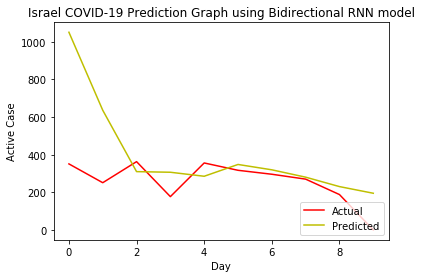

In [14]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from matplotlib.pyplot import *
time_steps=10
def evaluate_model(model,time_steps):
    
    # Prediction Time !!!!
#     predict_val =model.predict(x_valid)
    mse = mean_squared_error(y_valid[:-1],predict_val[:-1])
#     rmse = sqrt(mse)
    r = r2_score(y_valid[:-1],predict_val[:-1])
    return mse,r, y_valid, predict
mse,r2_score,true,predicted = evaluate_model(model,time_steps)
print('MSE = {}'.format(mse))
print('R-Squared Score = {}'.format(r2_score))



def plot_data(actual,predict):
    plt.plot(actual,c = 'r')
    plt.plot(predict,c = 'y')
    plt.xlabel('Day')
    plt.ylabel('Active Case')
    plt.title('Israel COVID-19 Prediction Graph using Bidirectional RNN model')
    plt.legend(['Actual','Predicted'],loc = 'lower right')
    plt.show()
plot_data(actual,predict)